<a href="https://colab.research.google.com/github/nayana309/odinschool/blob/main/capstone_credit_card_approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project 1

##Project proposal to predict credit card approval



# Section 1: Questions to Answer
## 1.Why is your proposal important in today’s world? How predicting a good client is worthy for a bank?

Accurately determining an applicant's creditworthiness is essential in the modern world, since financial fraud and default threats are common.
To estimate the chance of default or late payments, machine learning algorithms can examine a wide range of information.
Conventional credit scoring techniques could take a long time and mostly rely on manual evaluation. Applications for credit cards can be approved or denied more quickly by using machine learning models to automate the decision-making process.
One of the strategic objectives of banks is to acquire new credit card clients. Banks can target the appropriate demographic and improve their client acquisition strategy by appropriately evaluating creditworthiness.
An applicant's creditworthiness can be assessed more comprehensively because to machine learning models' ability to analyse a variety of variables, including those from non-traditional data sources.Conventional models of credit rating might not be able to do all this.

## 2.How is it going to impact the banking sector?

By putting in place a strong credit scoring algorithm, banks can lower their risk of suffering losses from nonpayment.
They can use it to recognise high-risk candidates early on in the application process and modify interest rates or credit restrictions appropriately.
Banks can handle a higher volume of applications thanks to more efficient credit approval procedures, which improves customer satisfaction and lowers operating expenses.Enhanced customer targeting helps to better target particular client segments with credit card services, which in turn improves overall customer satisfaction by increasing the likelihood of gaining dependable consumers.
Banks can make more educated and accurate lending decisions by using enhanced decision-making based on a comprehensive collection of features, which lowers the probability of admitting high-risk applications and minimises potential losses.

## 3.If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any bank in India.

In today's world, where data-driven decision-making is crucial, predicting credit card approval is of paramount importance to banks.
Properly assessing an applicant's creditworthiness not only reduces the risk of defaults but also enhances the overall efficiency of the credit card department.
This project aims to provide insights into the factors influencing credit card approval, contributing to better risk management and decision-making in the banking sector.Leveraging machine learning for credit card approval is a forward-looking strategy that aligns with the evolving nature of the banking sector. It not only enhances risk management but also contributes to operational efficiency, customer satisfaction, and the overall success of banks in the contemporary financial landscape.





# Data preprecessing -Before Building Machine learning model

In [ ]:
#import the required modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
#To read the csv file
df= pd.read_csv('/content/Credit_card.csv')
dd=pd.read_csv('/content/Credit_card_label.csv')

In [ ]:
# combining both the csv files
import pandas as pd
da=pd.read_csv('/content/Credit_card.csv')
dd=pd.read_csv('/content/Credit_card_label.csv')
df=pd.merge(df,dd,on='Ind_ID',how='inner')
print(df)

       Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0     5008827      M         Y             Y         0       180000.0   
1     5009744      F         Y             N         0       315000.0   
2     5009746      F         Y             N         0       315000.0   
3     5009749      F         Y             N         0            NaN   
4     5009752      F         Y             N         0       315000.0   
...       ...    ...       ...           ...       ...            ...   
1543  5028645      F         N             Y         0            NaN   
1544  5023655      F         N             N         0       225000.0   
1545  5115992      M         Y             Y         2       180000.0   
1546  5118219      M         Y             N         0       270000.0   
1547  5053790      F         Y             Y         0       225000.0   

               Type_Income                      EDUCATION  \
0                Pensioner               Higher education   
1

#Section 2: Initial Hypothesis (or hypotheses)

Hypothesis 1: Person having Higher annual income and property ownership positively influence credit card approval.

Hypothesis 2: Persons with a stable employment history and higher education level are more likely to have their credit card applications approved.

Hypothesis 3: Marital status and family size may play a role in credit card approval decisions.

Hypothesis 4: Certain demographic factors, such as gender and the presence of children, may have varying effects on credit card approval.




In [ ]:
#check first 5 rows of dataset
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [ ]:
#check last 5 rows of dataset
df.tail()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0
1547,5053790,F,Y,Y,0,225000.0,Working,Higher education,Married,House / apartment,-16601.0,-2859,1,0,0,0,NaN,2,0


In [ ]:
#to check the information of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [ ]:
#to check the shape
df.shape

(1548, 19)

In [ ]:
print("Number of Rows",df.shape[0])
print("Number of Columns",df.shape[1])

Number of Rows 1548
Number of Columns 19


In [ ]:
#to check null values in the dataset
df.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [ ]:
#to know the percentage of missing values
df.isnull().sum()/df.shape[0]*100

Ind_ID              0.000000
GENDER              0.452196
Car_Owner           0.000000
Propert_Owner       0.000000
CHILDREN            0.000000
Annual_income       1.485788
Type_Income         0.000000
EDUCATION           0.000000
Marital_status      0.000000
Housing_type        0.000000
Birthday_count      1.421189
Employed_days       0.000000
Mobile_phone        0.000000
Work_Phone          0.000000
Phone               0.000000
EMAIL_ID            0.000000
Type_Occupation    31.524548
Family_Members      0.000000
label               0.000000
dtype: float64

In [ ]:
#finding duplicates
df.duplicated().sum()

0

In [ ]:
#identifying the garbage value
for i in df.select_dtypes(include="object").columns:
  print(df[i].value_counts())
  print("****"*10)


F    973
M    568
Name: GENDER, dtype: int64
****************************************
N    924
Y    624
Name: Car_Owner, dtype: int64
****************************************
Y    1010
N     538
Name: Propert_Owner, dtype: int64
****************************************
Working                 798
Commercial associate    365
Pensioner               269
State servant           116
Name: Type_Income, dtype: int64
****************************************
Secondary / secondary special    1031
Higher education                  426
Incomplete higher                  68
Lower secondary                    21
Academic degree                     2
Name: EDUCATION, dtype: int64
****************************************
Married                 1049
Single / not married     227
Civil marriage           101
Separated                 96
Widow                     75
Name: Marital_status, dtype: int64
****************************************
House / apartment      1380
With parents             80
Municip

In [ ]:
# for imputing the missing values
from sklearn.impute import KNNImputer
impute=KNNImputer()

for i in df.select_dtypes(include="number").columns:
  df[i]=impute.fit_transform(df[[i]])

In [ ]:
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827.0,M,Y,Y,0.0,180000.00000,Pensioner,Higher education,Married,House / apartment,-18772.000000,365243.0,1.0,0.0,0.0,0.0,NaN,2.0,1.0
1,5009744.0,F,Y,N,0.0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586.0,1.0,1.0,1.0,0.0,NaN,2.0,1.0
2,5009746.0,F,Y,N,0.0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-16040.342071,-586.0,1.0,1.0,1.0,0.0,NaN,2.0,1.0
3,5009749.0,F,Y,N,0.0,191399.32623,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586.0,1.0,1.0,1.0,0.0,NaN,2.0,1.0
4,5009752.0,F,Y,N,0.0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586.0,1.0,1.0,1.0,0.0,NaN,2.0,1.0


# Exploratary Data Analysis(EDA)

In [ ]:
#descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ind_ID,1548.0,5.078920e+06,41717.587742,5008827.0,5045069.75,5078841.5,5115673.00,5150412.0
CHILDREN,1548.0,4.127907e-01,0.776691,0.0,0.00,0.0,1.00,14.0
Annual_income,1548.0,1.913993e+05,112407.951318,33750.0,121500.00,171000.0,225000.00,1575000.0
Birthday_count,1548.0,-1.604034e+04,4199.321477,-24946.0,-19476.00,-15814.5,-12483.00,-7705.0
Employed_days,1548.0,5.936469e+04,137808.062701,-14887.0,-3174.50,-1565.0,-431.75,365243.0
Mobile_phone,1548.0,1.000000e+00,0.000000,1.0,1.00,1.0,1.00,1.0
Work_Phone,1548.0,2.080103e-01,0.406015,0.0,0.00,0.0,0.00,1.0
Phone,1548.0,3.094315e-01,0.462409,0.0,0.00,0.0,1.00,1.0
EMAIL_ID,1548.0,9.237726e-02,0.289651,0.0,0.00,0.0,0.00,1.0
Family_Members,1548.0,2.161499e+00,0.947772,1.0,2.00,2.0,3.00,15.0


In [ ]:
df.describe(include="object")

,GENDER,Car_Owner,Propert_Owner,Type_Income,EDUCATION,Marital_status,Housing_type,Type_Occupation
count,1541,1548,1548,1548,1548,1548,1548,1060
unique,2,2,2,4,5,5,6,18
top,F,N,Y,Working,Secondary / secondary special,Married,House / apartment,Laborers
freq,973,924,1010,798,1031,1049,1380,268


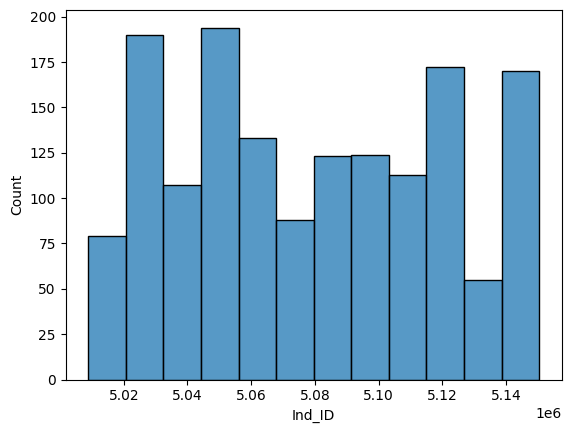

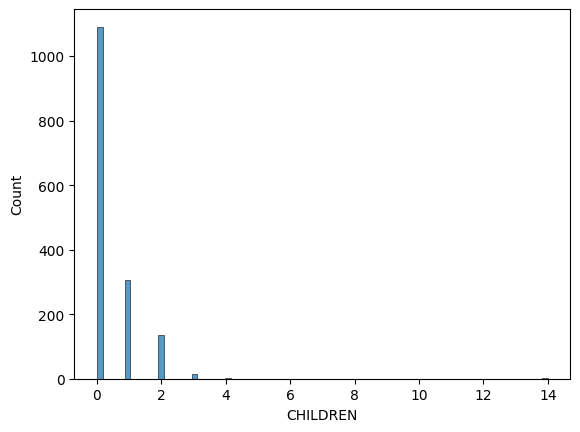

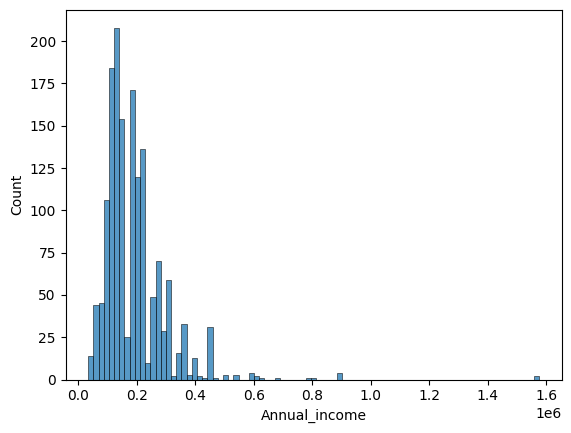

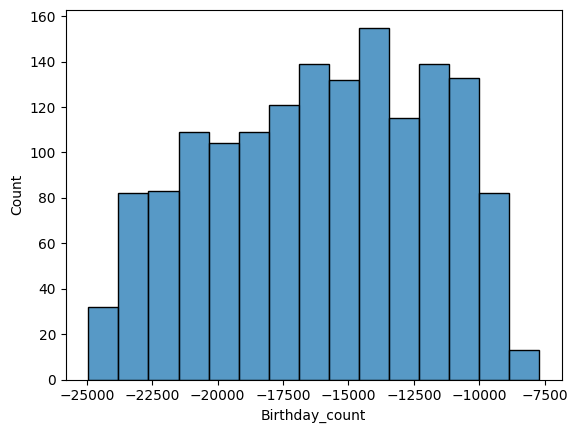

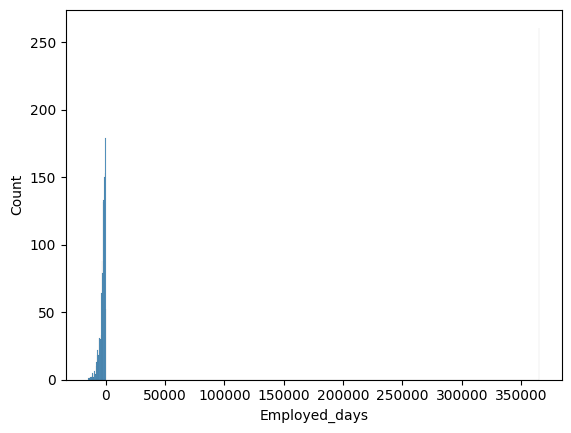

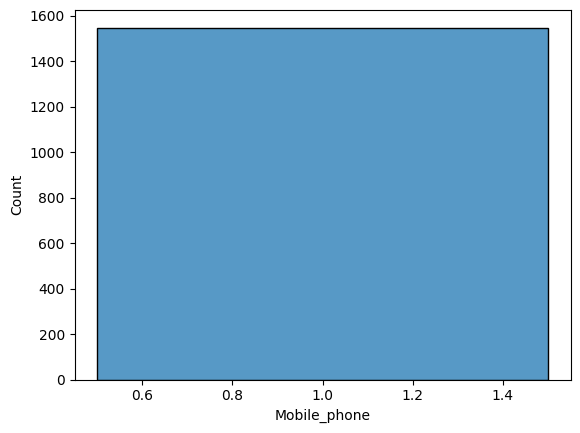

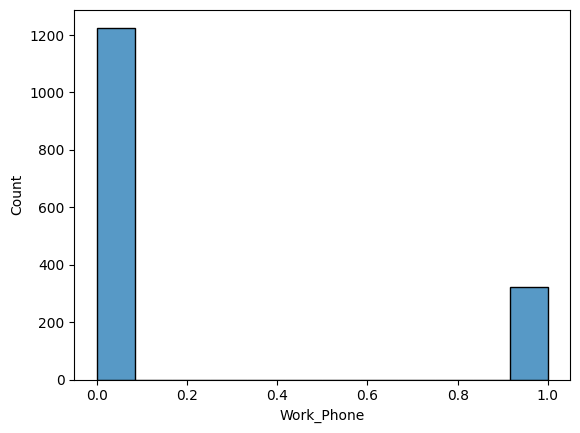

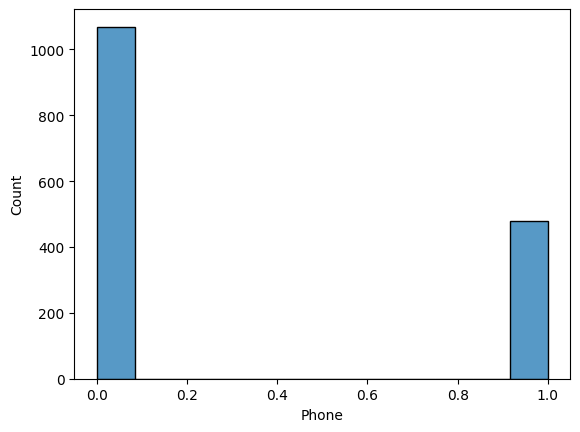

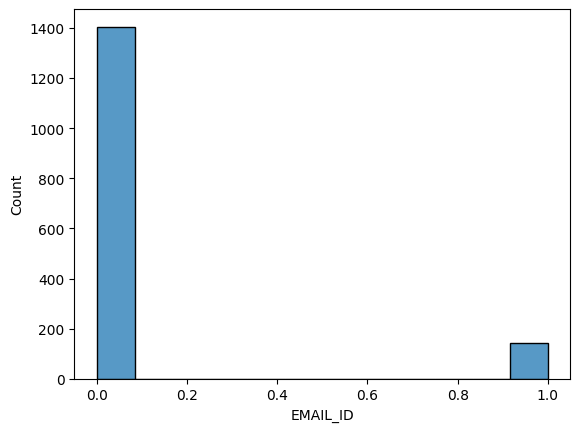

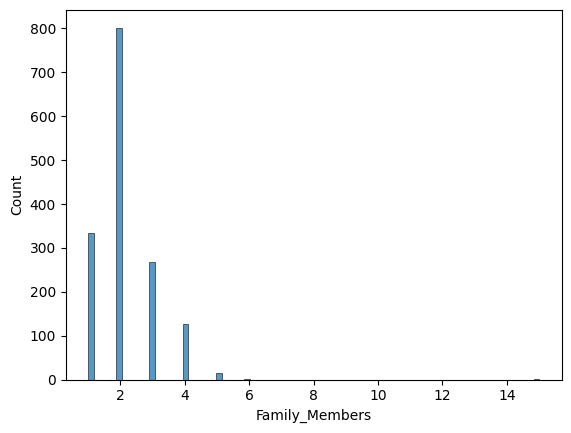

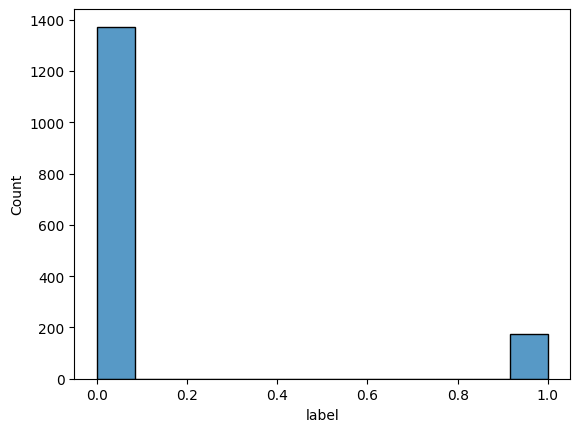

In [ ]:
#histogram to understand the distribution
for i in df.select_dtypes(include="number").columns:
  sns.histplot(data=df,x=i)
  plt.show()

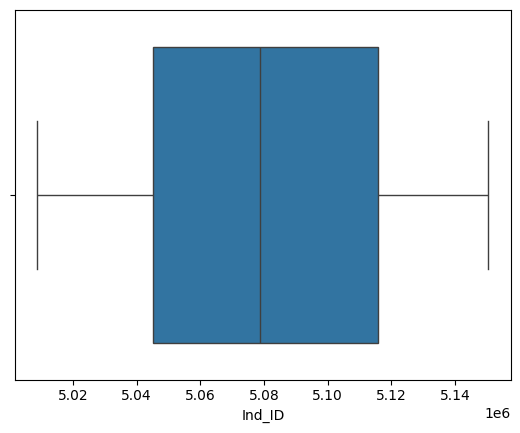

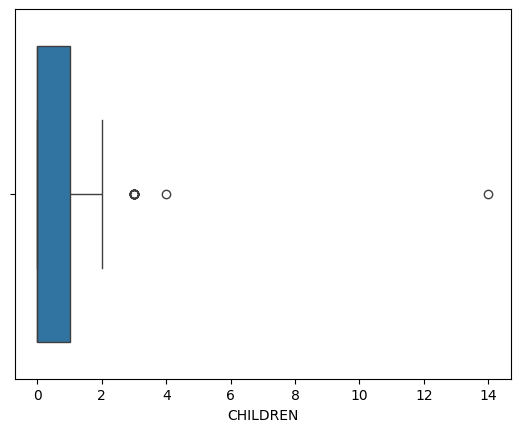

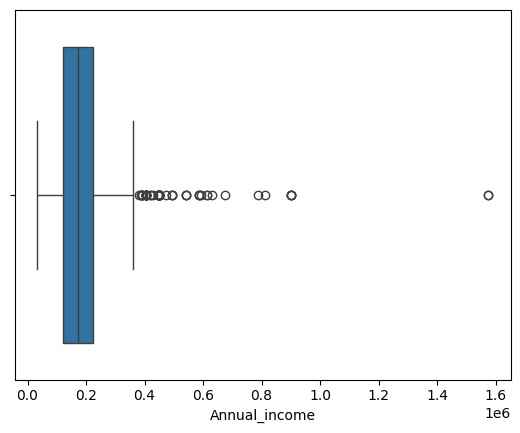

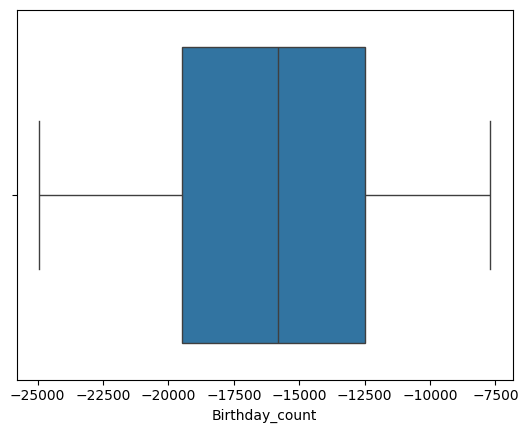

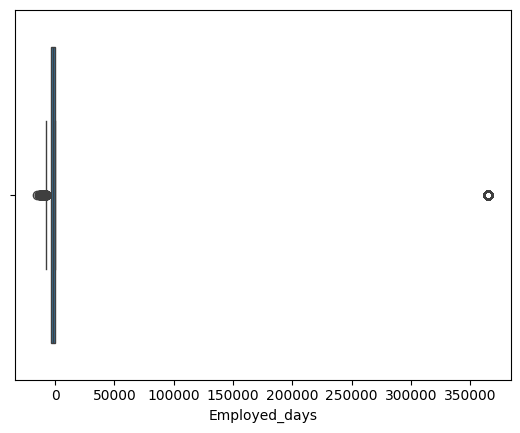

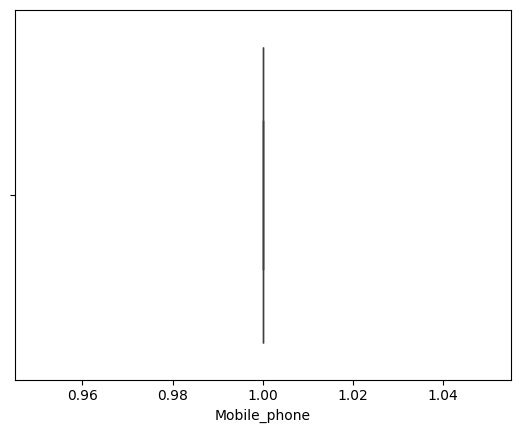

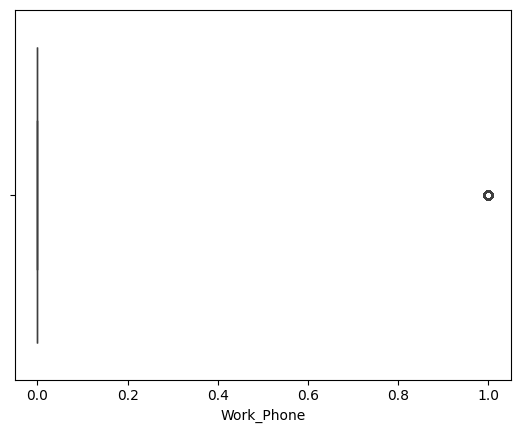

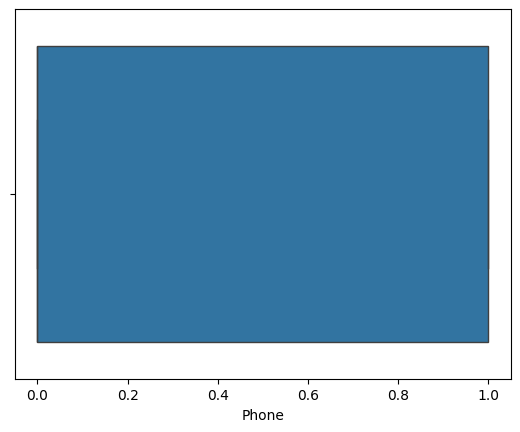

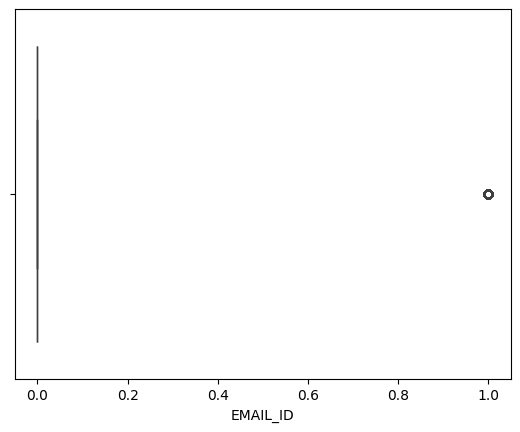

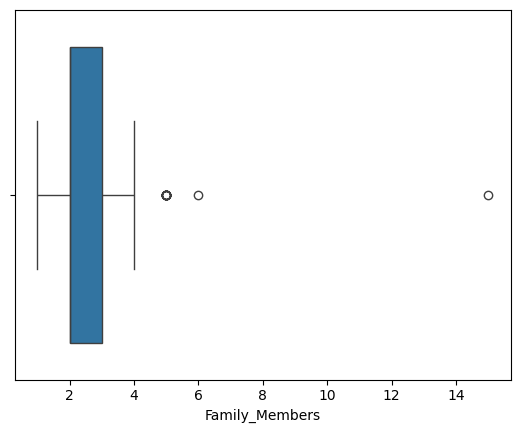

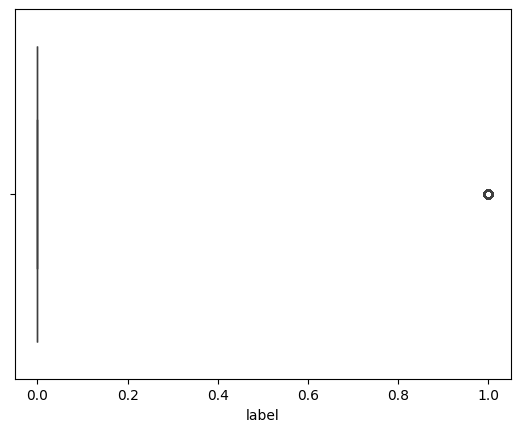

In [ ]:
#boxplot-to-identify  outliers
for i in df.select_dtypes(include="number").columns:
  sns.boxplot(data=df,x=i)
  plt.show()

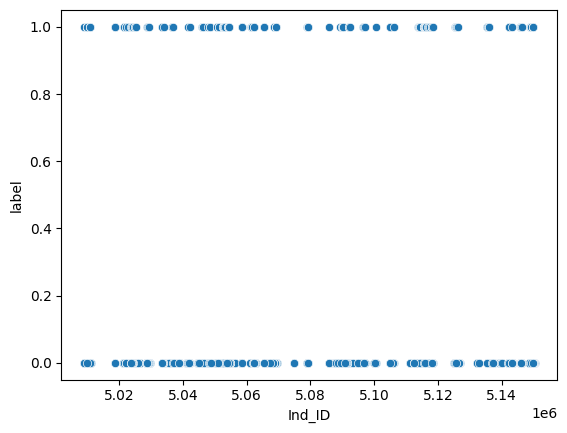

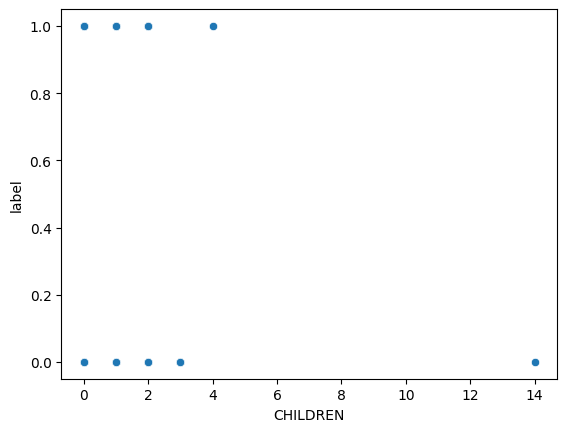

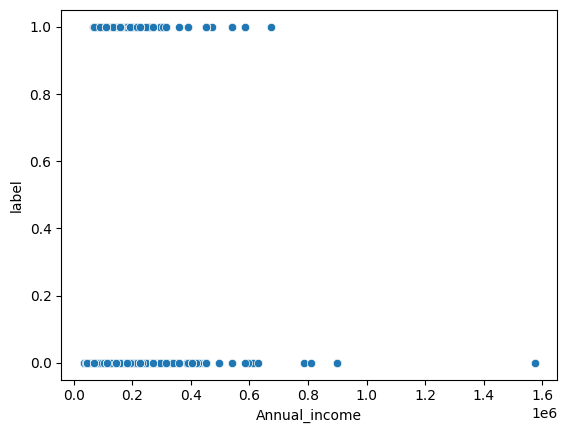

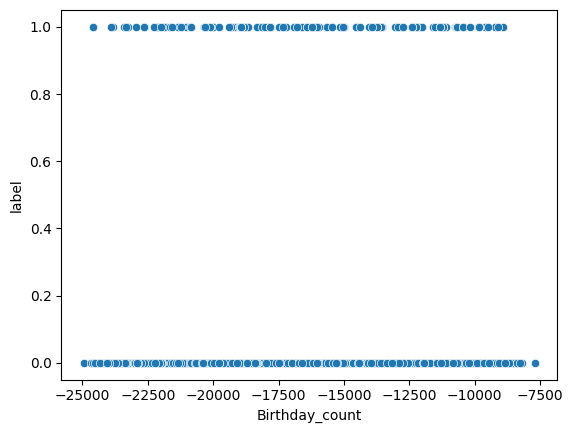

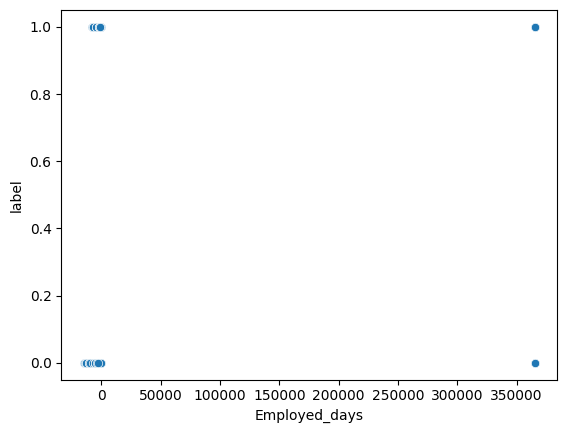

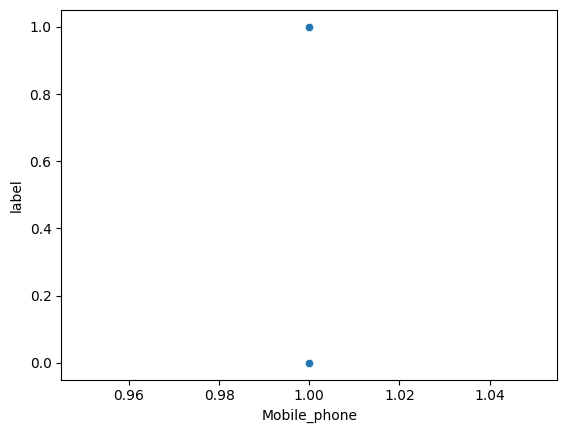

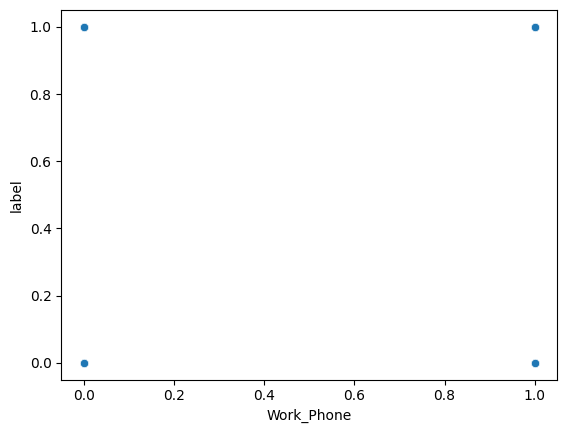

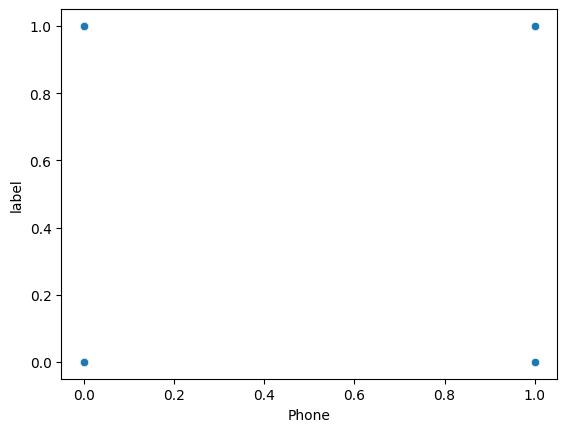

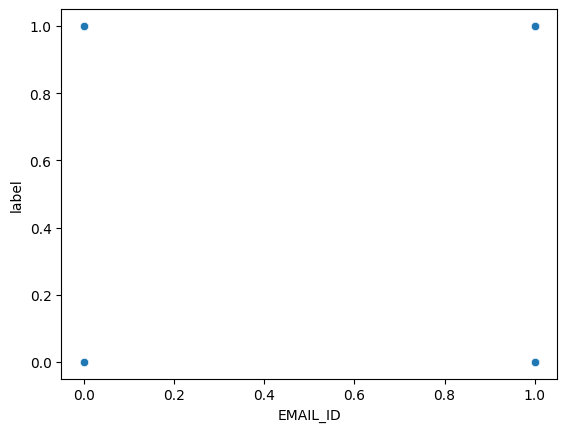

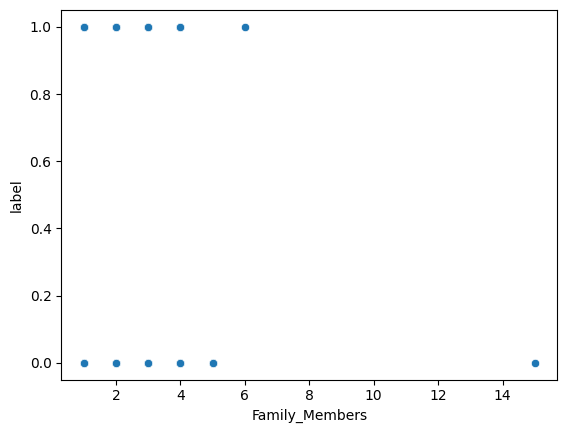

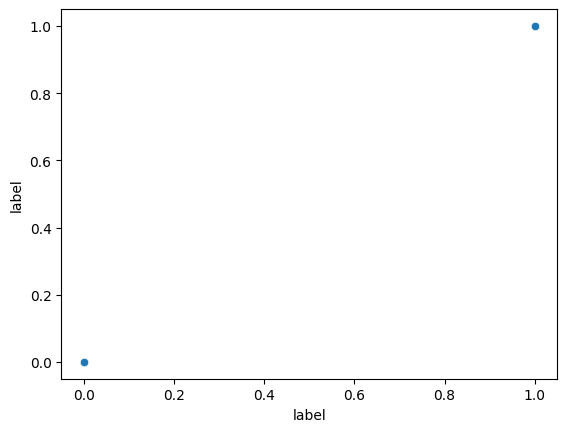

In [ ]:
#scatterplot to understand the relationship
for i in['Ind_ID', 'CHILDREN', 'Annual_income', 'Birthday_count',
       'Employed_days', 'Mobile_phone', 'Work_Phone', 'Phone', 'EMAIL_ID',
       'Family_Members', 'label']:
       sns.scatterplot(data=df,x=i,y='label')
       plt.show()


In [ ]:
df.select_dtypes(include="number").columns

Index(['Ind_ID', 'CHILDREN', 'Annual_income', 'Birthday_count',
       'Employed_days', 'Mobile_phone', 'Work_Phone', 'Phone', 'EMAIL_ID',
       'Family_Members', 'label'],
      dtype='object')

In [ ]:
#corelation with heatmap to interpret the relation and multicolliniarity
s=df.select_dtypes(include="number").corr()


<Axes: >

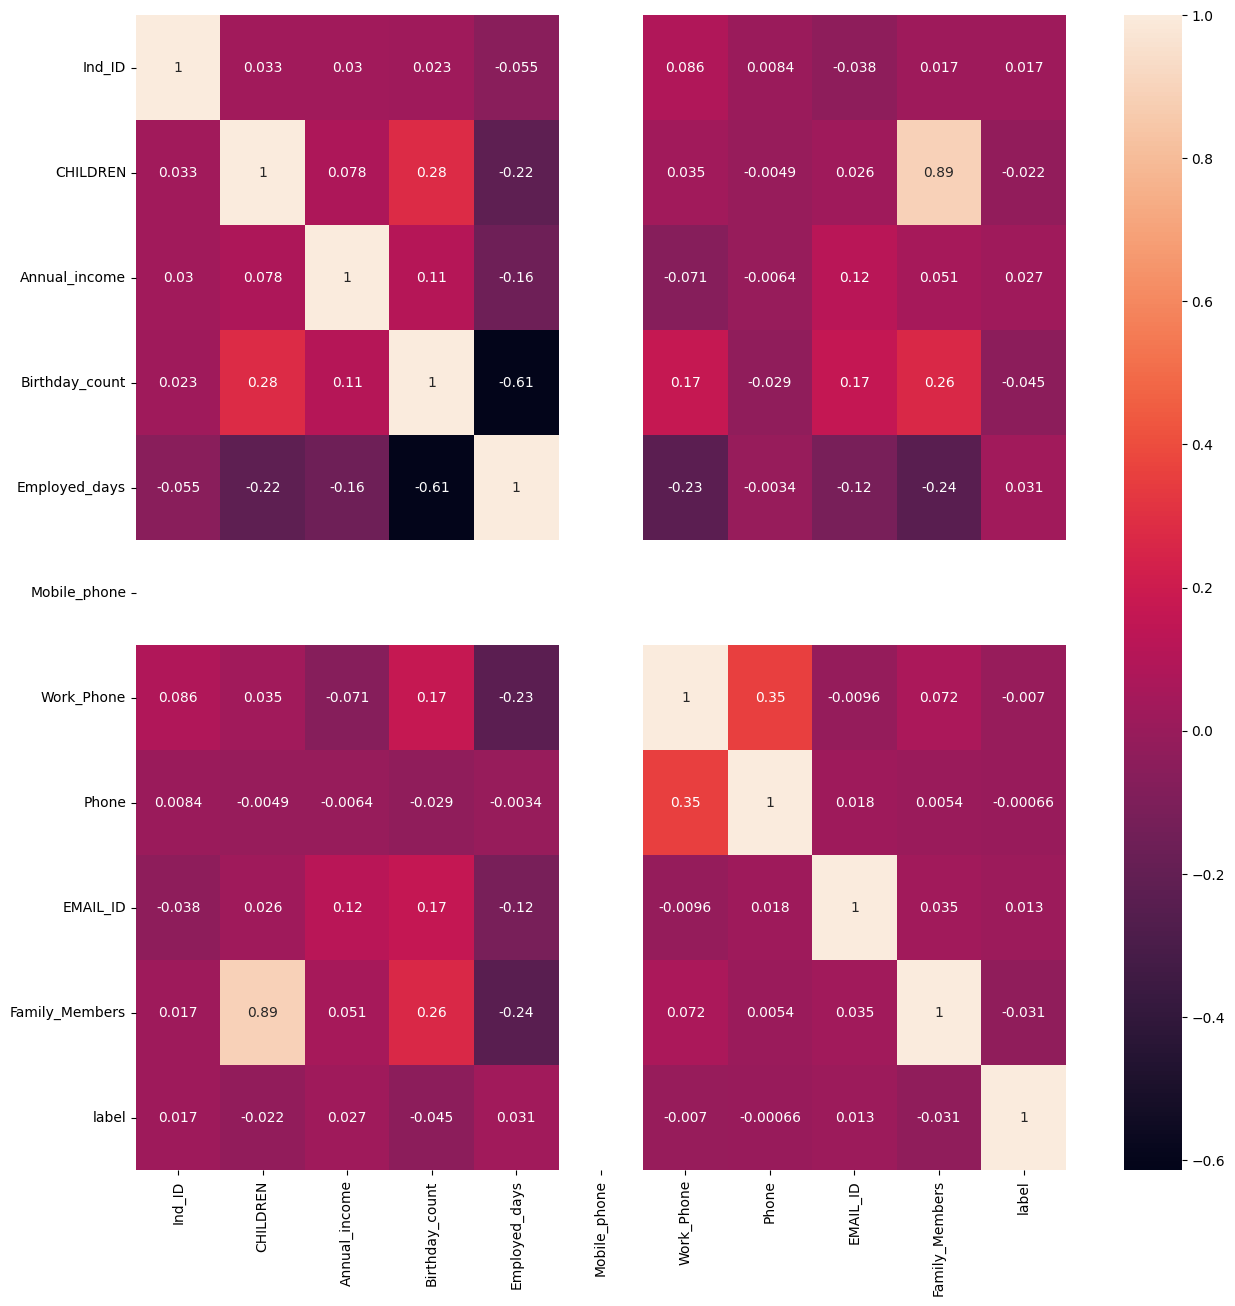

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(s,annot=True)

In [ ]:
#outliers Treatment

def wisker(col):
  q1,q3=np.percentile(col,[25,75])
  iqr=q3-q1
  lw=q1-1.5*iqr
  uw=q3+1.5*iqr
  return lw,uw

In [ ]:
wisker(df['Annual_income']) #using wisker too know the range

(-33750.0, 380250.0)

In [ ]:
for i in['Annual_income','Employed_days','Family_Members','CHILDREN']:
  lw,uw=wisker(df[i])
  df[i]=np.where(df[i]<lw,lw,df[i])
  df[i]=np.where(df[i]>uw,uw,df[i])


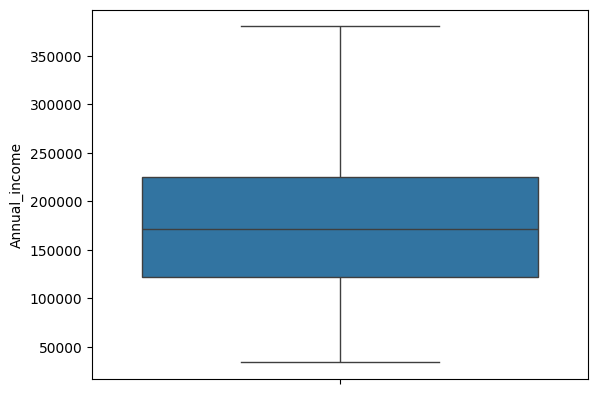

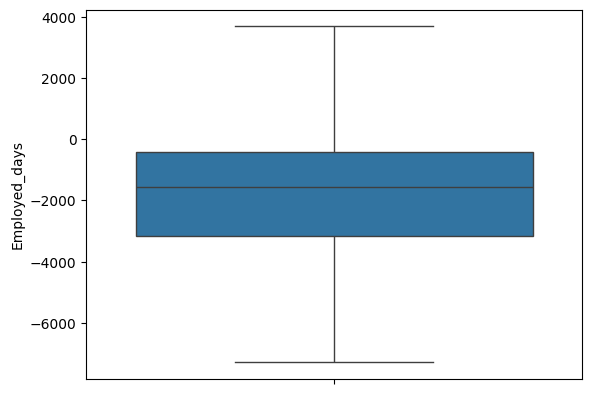

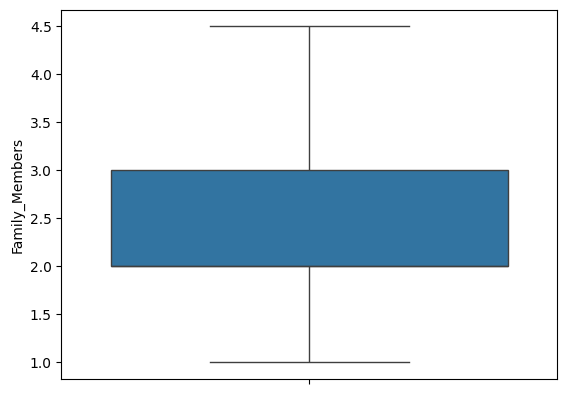

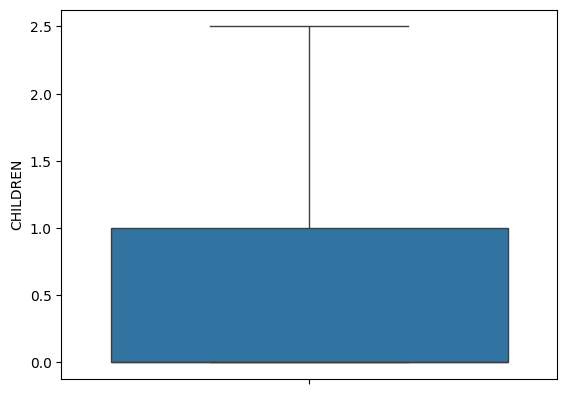

In [ ]:
for i in['Annual_income','Employed_days','Family_Members','CHILDREN']:
  sns.boxplot(df[i])
  plt.show()

In [ ]:
df.isnull().sum().sum() # to check the nullvalues

495

In [ ]:
df=df.fillna(method='bfill') # fill the null values with backwordvalues
df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827.0,M,Y,Y,0.0,180000.00000,Pensioner,Higher education,Married,House / apartment,-18772.000000,3682.375,1.0,0.0,0.0,0.0,Core staff,2.0,1.0
1,5009744.0,F,Y,N,0.0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586.000,1.0,1.0,1.0,0.0,Core staff,2.0,1.0
2,5009746.0,F,Y,N,0.0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-16040.342071,-586.000,1.0,1.0,1.0,0.0,Core staff,2.0,1.0
3,5009749.0,F,Y,N,0.0,191399.32623,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586.000,1.0,1.0,1.0,0.0,Core staff,2.0,1.0
4,5009752.0,F,Y,N,0.0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586.000,1.0,1.0,1.0,0.0,Core staff,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645.0,F,N,Y,0.0,191399.32623,Commercial associate,Higher education,Married,House / apartment,-11957.000000,-2182.000,1.0,0.0,0.0,0.0,Managers,2.0,0.0
1544,5023655.0,F,N,N,0.0,225000.00000,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.000000,-1209.000,1.0,0.0,0.0,0.0,Accountants,1.0,0.0
1545,5115992.0,M,Y,Y,2.0,180000.00000,Working,Higher education,Married,House / apartment,-13174.000000,-2477.000,1.0,0.0,0.0,0.0,Managers,4.0,0.0
1546,5118219.0,M,Y,N,0.0,270000.00000,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.000000,-645.000,1.0,1.0,1.0,0.0,Drivers,2.0,0.0


In [ ]:
df=df.dropna(how='all')

In [ ]:
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827.0,M,Y,Y,0.0,180000.00000,Pensioner,Higher education,Married,House / apartment,-18772.000000,3682.375,1.0,0.0,0.0,0.0,Core staff,2.0,1.0
1,5009744.0,F,Y,N,0.0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586.000,1.0,1.0,1.0,0.0,Core staff,2.0,1.0
2,5009746.0,F,Y,N,0.0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-16040.342071,-586.000,1.0,1.0,1.0,0.0,Core staff,2.0,1.0
3,5009749.0,F,Y,N,0.0,191399.32623,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586.000,1.0,1.0,1.0,0.0,Core staff,2.0,1.0
4,5009752.0,F,Y,N,0.0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586.000,1.0,1.0,1.0,0.0,Core staff,2.0,1.0


In [ ]:
#duplicates and garbage value treatment
df.drop_duplicates()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827.0,M,Y,Y,0.0,180000.00000,Pensioner,Higher education,Married,House / apartment,-18772.000000,3682.375,1.0,0.0,0.0,0.0,Core staff,2.0,1.0
1,5009744.0,F,Y,N,0.0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586.000,1.0,1.0,1.0,0.0,Core staff,2.0,1.0
2,5009746.0,F,Y,N,0.0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-16040.342071,-586.000,1.0,1.0,1.0,0.0,Core staff,2.0,1.0
3,5009749.0,F,Y,N,0.0,191399.32623,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586.000,1.0,1.0,1.0,0.0,Core staff,2.0,1.0
4,5009752.0,F,Y,N,0.0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586.000,1.0,1.0,1.0,0.0,Core staff,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645.0,F,N,Y,0.0,191399.32623,Commercial associate,Higher education,Married,House / apartment,-11957.000000,-2182.000,1.0,0.0,0.0,0.0,Managers,2.0,0.0
1544,5023655.0,F,N,N,0.0,225000.00000,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.000000,-1209.000,1.0,0.0,0.0,0.0,Accountants,1.0,0.0
1545,5115992.0,M,Y,Y,2.0,180000.00000,Working,Higher education,Married,House / apartment,-13174.000000,-2477.000,1.0,0.0,0.0,0.0,Managers,4.0,0.0
1546,5118219.0,M,Y,N,0.0,270000.00000,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.000000,-645.000,1.0,1.0,1.0,0.0,Drivers,2.0,0.0


# Section 3: Data analysis approach

##1.What approach are you going to take in order to prove or disprove your hypothesis?

1.Exploratory Data Analysis (EDA): Explore the distribution of key features and their relationships with the target variable.
2.Feature Engineering: Create new features if necessary and transform existing features for better model performance.
3.Statistical Analysis: Conduct statistical tests to validate initial hypotheses.
4.Visualization: Use visualizations to illustrate patterns and relationships in the data.

##2.What feature engineering techniques will be relevant to your project?

1.Handling the missing data-Identifying and handling the missing values.
2.Converting Categorical values-converting categorical values into numerical values
3.Normalize numerical features (e.g., Annual_income, Employed_days) to ensure that all features have similar scales.

##3.Please justify your data analysis approach.

1.EDA:
 By using EDA, we may find outliers, comprehend the distribution of important properties, and learn more about the characteristics of the data. EDA facilitates the identification of patterns and possible correlations by visually examining the links between attributes and the target variable The dataset's missing values can be found with the help of EDA.

 2. Feature Engineering:
Improving Model Performance: One of the most important stages in getting the data ready for machine learning models is feature engineering. By ensuring that the algorithms can efficiently learn from the input, strategies including scaling features, addressing missing data, and encoding categorical variables all help to improve model performance.

3.Statistical Analysis:
 Based on domain expertise and EDA, preliminary hypotheses are developed and then validated using statistical analysis.
Statistical analysis finds features that have a statistically significant effect on the target variable, which helps in the process of choosing features. This guarantees that the most pertinent data is used to build the model.

4.Visualization:
 For both technical and non-technical stakeholders, visualisations are an effective tool for explaining intricate linkages and patterns.
 An iterative exploration process is facilitated by visualisations. Visualisations can be modified to concentrate on certain data points as insights from statistical analysis and exploratory data analysis are obtained, strengthening the overall analytical procedure.

## 4.Identify important patterns in your data using the EDA approach to justify your findings.

Histogram is used to understand the distribution of each column
Boxplot is to identify the outliers by performing this step we can get to know the outliers in the data.
In this boxplot the annual income,Employed days,Family members,childern have the outliers.
To solve the outliers we are using the wisker plot the lower wisker ,upper wisker will remove the outliers.

# Encoding the data

In [ ]:
#converting categorical data to numerical data we can use eithes label encoding | dummies
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()
label=le.fit_transform(df["Type_Occupation"])

In [ ]:
le.classes_

array(['Accountants', 'Cleaning staff', 'Cooking staff', 'Core staff',
       'Drivers', 'HR staff', 'High skill tech staff', 'IT staff',
       'Laborers', 'Low-skill Laborers', 'Managers', 'Medicine staff',
       'Private service staff', 'Realty agents', 'Sales staff',
       'Secretaries', 'Security staff', 'Waiters/barmen staff', nan],
      dtype=object)

In [ ]:
df["Type_Occupation"]=label

In [ ]:
label=le.fit_transform(df["Type_Income"])
df["Type_Income"]=label

In [ ]:
label=le.fit_transform(df["GENDER"])
df["GENDER"]=label

In [ ]:
label=le.fit_transform(df["Car_Owner"])
df["Car_Owner"]=label

In [ ]:
label=le.fit_transform(df["Propert_Owner"])
df["Propert_Owner"]=label

In [ ]:
label=le.fit_transform(df["EDUCATION"])
df["EDUCATION"]=label

In [ ]:
label=le.fit_transform(df["Marital_status"])
df["Marital_status"]=label

In [ ]:
label=le.fit_transform(df["Housing_type"])
df["Housing_type"]=label

In [ ]:
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827.0,1,1,1,0.0,180000.00000,1,1,1,1,-18772.000000,3682.375,1.0,0.0,0.0,0.0,3,2.0,1.0
1,5009744.0,0,1,0,0.0,315000.00000,0,1,1,1,-13557.000000,-586.000,1.0,1.0,1.0,0.0,3,2.0,1.0
2,5009746.0,0,1,0,0.0,315000.00000,0,1,1,1,-16040.342071,-586.000,1.0,1.0,1.0,0.0,3,2.0,1.0
3,5009749.0,0,1,0,0.0,191399.32623,0,1,1,1,-13557.000000,-586.000,1.0,1.0,1.0,0.0,3,2.0,1.0
4,5009752.0,0,1,0,0.0,315000.00000,0,1,1,1,-13557.000000,-586.000,1.0,1.0,1.0,0.0,3,2.0,1.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mx=MinMaxScaler() # to standardise the data we use min max scaler

In [ ]:
for col in df:
  mx=MinMaxScaler()
  df[col]=mx.fit_transform(df[[col]])

In [ ]:
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,0.000000,1.0,1.0,1.0,0.0,0.422078,0.333333,0.25,0.25,0.2,0.358100,1.00000,0.0,0.0,0.0,0.0,0.166667,0.285714,1.0
1,0.006477,0.0,1.0,0.0,0.0,0.811688,0.000000,0.25,0.25,0.2,0.660577,0.61094,0.0,1.0,1.0,0.0,0.166667,0.285714,1.0
2,0.006491,0.0,1.0,0.0,0.0,0.811688,0.000000,0.25,0.25,0.2,0.516540,0.61094,0.0,1.0,1.0,0.0,0.166667,0.285714,1.0
3,0.006512,0.0,1.0,0.0,0.0,0.454976,0.000000,0.25,0.25,0.2,0.660577,0.61094,0.0,1.0,1.0,0.0,0.166667,0.285714,1.0
4,0.006533,0.0,1.0,0.0,0.0,0.811688,0.000000,0.25,0.25,0.2,0.660577,0.61094,0.0,1.0,1.0,0.0,0.166667,0.285714,1.0


# Imbalanced Data
 The label column is imbalnced to get the model accuracy we will peform the over sampling technique.

In [ ]:
df['label'].value_counts()

0.0    1373
1.0     175
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

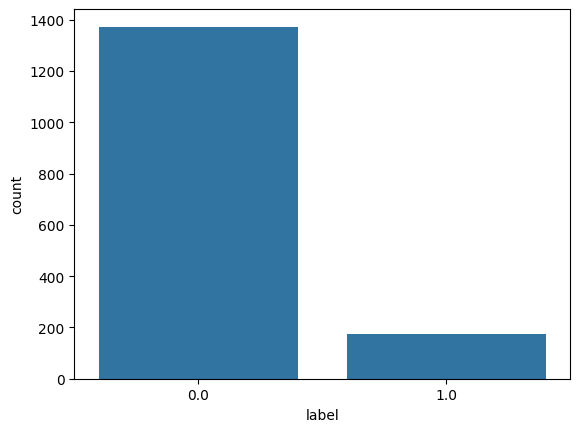

In [ ]:
sns.countplot(x=df['label'])

In [ ]:
#Store feature matrix in X and Response(Target) in vector y
X=df.drop(columns='label',axis=1)
Y=df['label']

In [ ]:
#splitting the dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)


# Logistic Regression

Logistic Regression is a statistical method used for binary classification problems, where the dependent variable is categorical and has two classes (usually coded as 0
and 1). Despite its name, logistic regression is primarily used for classification rather
than regression tasks. It models the probability of an event occurring as a function of
one or more predictor

In [ ]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_pred1=model.predict(X_test)
accuracy_score(Y_test,y_pred1)

0.8838709677419355

In [ ]:
y_pred=model.predict(X_train)
accuracy_score(Y_train,y_pred)

0.8872936109117013

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score

# Precision:
Precision measures the accuracy of positive predictions. It calculates the ratio of true
positive predictions to the total number of positive predictions made by the model.
Precision=True Positives/True Positives + False Positive

#Recall_score:
Recall, also known as sensitivity or true positive rate, measures the ability of the model
to capture all positive instances. It calculates the ratio of true positive predictions to the
total number of actual positive instances. Recall=True Positives/True Positives + False Negative

#f1_score:
The F1 score is the harmonic mean of precision and recall. It provides a balanced
measure of a model's performance. F1 Score=2×Precision×Recall/Precision + Recall

In [ ]:
precision_score(Y_test,y_pred1,zero_division=1)

1.0

In [ ]:
recall_score(Y_test,y_pred1,zero_division=1)

0.0

In [ ]:
f1_score(Y_test,y_pred1,zero_division=1)

0.0

# OverSampling

In over sampling the minority class we try to increase the records of minority class by duplicating the records which can match to the total number of records in our majority class.

In [ ]:
X=df.drop(columns='label',axis=1)
Y=df['label']

In [ ]:
X.shape

(1548, 18)

In [ ]:
Y.shape

(1548,)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X_res,Y_res=SMOTE().fit_resample(X,Y)

In [ ]:
X_res.shape

(2746, 18)

In [ ]:
Y_res.shape

(2746,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_res,Y_res,test_size=0.1,stratify=Y_res,random_state=2)

# Logistic Regression

Logistic Regression is a statistical method used for binary classification problems, where the dependent variable is categorical and has two classes (usually coded as 0
and 1). Despite its name, logistic regression is primarily used for classification rather
than regression tasks. It models the probability of an event occurring as a function of
one or more predictor.




In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
y_pred1=model.predict(X_test)
accuracy_score(Y_test,y_pred1)

0.5781818181818181

In [ ]:
precision_score(Y_test,y_pred1)

0.5766423357664233

In [ ]:
recall_score(Y_test,y_pred1)

0.5766423357664233

In [ ]:
f1_score(Y_test,y_pred1)

0.5766423357664233

# Decision tree classifier

Decision Trees are versatile and widely used machine learning algorithms that can
be applied to both classification and regression tasks. They work by recursively
partitioning the dataset into subsets based on the values of input features, making
decisions at each node of the tree.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
y_pred2=dt.predict(X_test)
accuracy_score(Y_test,y_pred2)

0.8763636363636363

In [ ]:
precision_score(Y_test,y_pred2)

0.8503401360544217

In [ ]:
recall_score(Y_test,y_pred2)

0.9124087591240876

In [ ]:
f1_score(Y_test,y_pred2)

0.8802816901408451

# Random forest classifier
The Decision Tree Regressor is used for regression tasks, where the goal is to predict a
continuous target variable.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
y_pred3=rf.predict(X_test)
accuracy_score(Y_test,y_pred3)

0.9563636363636364

In [ ]:
precision_score(Y_test,y_pred3)

0.9770992366412213

In [ ]:
recall_score(Y_test,y_pred3)

0.9343065693430657

In [ ]:
f1_score(Y_test,y_pred3)

0.9552238805970148

# Support Vector Machine
It is a powerful supervised machine learning algorithm that can be used for both
classification and regression tasks. SVM is particularly effective in high-dimensional
spaces and is widely used in various domains, including image classification, text
classification, and bioinformatics. The primary objective of SVM is to find a hyperplane
that best separates the data into different classes while maximizing the margin
between the classes.

In [ ]:
from sklearn import svm
sv=svm.SVC(kernel="linear")
sv.fit(X_train,Y_train)

SVC(kernel='linear')

In [ ]:
y_pred4=sv.predict(X_test)
accuracy_score(Y_test,y_pred4)

0.5745454545454546

In [ ]:
precision_score(Y_test,y_pred4)

0.5694444444444444

In [ ]:
recall_score(Y_test,y_pred4)

0.5985401459854015

In [ ]:
f1_score(Y_test,y_pred4)

0.5836298932384342

In [ ]:
final_data=pd.DataFrame({'Models':['LR','DT','RF','SV'],
                         "ACC":[accuracy_score(Y_test,y_pred1)*100,
                                accuracy_score(Y_test,y_pred2)*100,
                                accuracy_score(Y_test,y_pred3)*100,
                                accuracy_score(Y_test,y_pred4)*100]})
print(final_data)

  Models        ACC
0     LR  57.818182
1     DT  87.636364
2     RF  95.636364
3     SV  57.454545


<Axes: xlabel='Models', ylabel='ACC'>

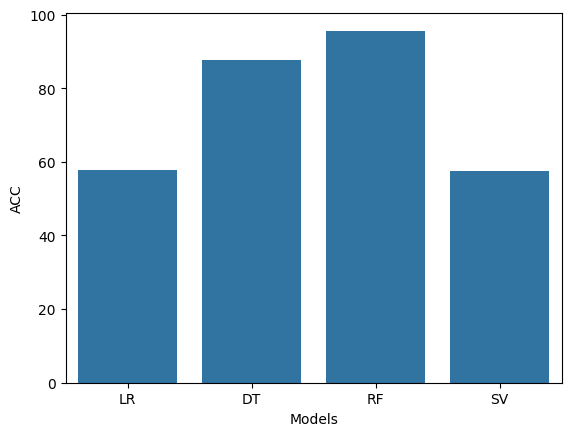

In [ ]:
sns.barplot(x=final_data['Models'], y=final_data['ACC'])

##Section 4: Machine learning approach

#1.What method will you use for machine learning based predictions for credit card approval?

1. Logistic Regression  
2. Decesion Tree Classifier
3. Random forest classifier  
4. support vector machine

##2.Please justify the most appropriate model.
Most Appropriate Model: Random Forest (RF)

Accuracy: 97.45%

Random Forests demonstrate the highest accuracy among the models after oversampling.
RFs are well-suited for balanced datasets, providing robust and accurate predictions.
The ensemble nature of RFs allows them to handle the complexities of the oversampled data effectively.
RFs provide feature importance insights and are generally robust across different types of data.
While accuracy is a crucial metric, it's important to consider other metrics (precision, recall, F1 score) for a more comprehensive evaluation.





# Checking The data is Approved or not

In [ ]:
input_data = (0.756895,1.0,1.0,1.0,.8,0.422078,1.0,0.25,0.25,0.2,0.682791,0.438577,0.0,0.0,0.0,0.0,0.555556,0.857143)#0
#input_data = (0.000000,1.0,1.0,1.0,0.0,0.422078,0.333333,0.25,0.25,0.2,0.358100,1.00000,0.0,0.0,0.0,0.0,0.166667,0.285714)#1

#changing the input_data to numpy_array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting for one approval
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=rf.predict(input_data_reshaped)
print(prediction)

if(prediction[0] == 0):
  print("The person credit card is not approved")
else:
  print("The person credit card is approved")

[0.]
The person credit card is not approved


In [ ]:
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,0.000000,1.0,1.0,1.0,0.0,0.422078,0.333333,0.25,0.25,0.2,0.358100,1.00000,0.0,0.0,0.0,0.0,0.166667,0.285714,1.0
1,0.006477,0.0,1.0,0.0,0.0,0.811688,0.000000,0.25,0.25,0.2,0.660577,0.61094,0.0,1.0,1.0,0.0,0.166667,0.285714,1.0
2,0.006491,0.0,1.0,0.0,0.0,0.811688,0.000000,0.25,0.25,0.2,0.516540,0.61094,0.0,1.0,1.0,0.0,0.166667,0.285714,1.0
3,0.006512,0.0,1.0,0.0,0.0,0.454976,0.000000,0.25,0.25,0.2,0.660577,0.61094,0.0,1.0,1.0,0.0,0.166667,0.285714,1.0
4,0.006533,0.0,1.0,0.0,0.0,0.811688,0.000000,0.25,0.25,0.2,0.660577,0.61094,0.0,1.0,1.0,0.0,0.166667,0.285714,1.0


In [ ]:
df.tail()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
1543,0.139972,0.0,0.0,1.0,0.0,0.454976,0.0,0.25,0.25,0.2,0.753379,0.465466,0.0,0.0,0.0,0.0,0.555556,0.285714,0.0
1544,0.104729,0.0,0.0,0.0,0.0,0.551948,0.0,0.50,0.75,0.2,0.853605,0.554154,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
1545,0.756895,1.0,1.0,1.0,0.8,0.422078,1.0,0.25,0.25,0.2,0.682791,0.438577,0.0,0.0,0.0,0.0,0.555556,0.857143,0.0
1546,0.772624,1.0,1.0,0.0,0.0,0.681818,1.0,1.00,0.00,0.2,0.559944,0.605562,0.0,1.0,1.0,0.0,0.222222,0.285714,0.0
1547,0.317569,0.0,1.0,1.0,0.0,0.551948,1.0,0.25,0.25,0.2,0.484021,0.403758,0.0,0.0,0.0,0.0,1.000000,0.285714,0.0


To save the updated file

In [ ]:
df.to_csv("file.csv")

## SQL QUERIES

In [ ]:
# to write the sql queries in googgle collab we use duck db
import duckdb

# 'df' is  DataFrame
conn = duckdb.connect()
conn.register('df',df)

# 1.Group the customers based on their income type and find the average of their annual income.

In [ ]:
result = conn.execute('SELECT Type_Income, AVG(Annual_income) AS AvgIncome FROM df GROUP BY Type_Income').fetchdf()

# Print the result
print(result)

   Type_Income  AvgIncome
0     0.333333   0.342284
1     0.000000   0.522091
2     1.000000   0.419129
3     0.666667   0.487461


#2.Find the female owners of cars and property.



In [ ]:
result = conn.execute('SELECT * FROM df WHERE GENDER = 1 AND (Car_Owner = 1 OR Propert_Owner = 1)').fetchdf()

# Print the result
print(result)

       Ind_ID  GENDER  Car_Owner  Propert_Owner  CHILDREN  Annual_income  \
0    0.000000     1.0        1.0            1.0       0.0       0.422078   
1    0.014387     1.0        1.0            1.0       0.4       1.000000   
2    0.014415     1.0        1.0            1.0       0.4       1.000000   
3    0.014422     1.0        1.0            1.0       0.4       1.000000   
4    0.097397     1.0        1.0            1.0       0.0       0.487013   
..        ...     ...        ...            ...       ...            ...   
489  0.679747     1.0        0.0            1.0       0.0       0.357143   
490  0.496522     1.0        0.0            1.0       0.0       0.681818   
491  0.564057     1.0        0.0            1.0       0.4       0.292208   
492  0.572991     1.0        0.0            1.0       0.4       0.266234   
493  0.822361     1.0        0.0            1.0       0.0       0.357143   

     Type_Income  EDUCATION  Marital_status  Housing_type  Birthday_count  \
0       0.

#3.Find the male customers who are staying with their families.

In [ ]:
result = conn.execute('SELECT * FROM df WHERE GENDER = 0 AND Family_Members > 0.28').fetchdf()

# Print the result
print(result)

       Ind_ID  GENDER  Car_Owner  Propert_Owner  CHILDREN  Annual_income  \
0    0.006477     0.0        1.0            0.0       0.0       0.811688   
1    0.006491     0.0        1.0            0.0       0.0       0.811688   
2    0.006512     0.0        1.0            0.0       0.0       0.454976   
3    0.006533     0.0        1.0            0.0       0.0       0.811688   
4    0.006540     0.0        1.0            0.0       0.0       0.811688   
..        ...     ...        ...            ...       ...            ...   
735  0.996709     0.0        0.0            1.0       0.0       0.422078   
736  0.107511     0.0        1.0            1.0       0.4       0.318182   
737  0.764474     0.0        0.0            1.0       0.8       0.551948   
738  0.139972     0.0        0.0            1.0       0.0       0.454976   
739  0.317569     0.0        1.0            1.0       0.0       0.551948   

     Type_Income  EDUCATION  Marital_status  Housing_type  Birthday_count  \
0       0.

# 4.Please list the top five people having the highest income.

In [ ]:
result = conn.execute('SELECT * FROM df ORDER BY Annual_income DESC LIMIT 5').fetchdf()

# Print the result
print(result)

     Ind_ID  GENDER  Car_Owner  Propert_Owner  CHILDREN  Annual_income  \
0  0.014387     1.0        1.0            1.0       0.4            1.0   
1  0.014415     1.0        1.0            1.0       0.4            1.0   
2  0.014422     1.0        1.0            1.0       0.4            1.0   
3  0.088117     1.0        0.0            0.0       0.4            1.0   
4  0.108670     0.0        1.0            1.0       0.0            1.0   

   Type_Income  EDUCATION  Marital_status  Housing_type  Birthday_count  \
0     0.000000       1.00            0.25           0.2        0.392843   
1     0.333333       1.00            0.25           0.2        0.392843   
2     0.000000       1.00            0.75           0.2        0.392843   
3     0.333333       0.25            0.25           1.0        0.930282   
4     0.000000       0.25            0.25           0.2        0.536164   

   Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID  Type_Occupation  \
0       0.602554        

#5.How many married people are having bad credit?

In [ ]:
result = conn.execute('SELECT COUNT(*) AS BadCredit FROM df WHERE Marital_status = 1 AND label = 0').fetchdf()

# Print the result
print(result)

   BadCredit
0         67


# 6.What is the highest education level and what is the total count?

In [ ]:
result = conn.execute('SELECT MAX(EDUCATION) AS HighestEducation, COUNT(*) AS TotalCount FROM df').fetchdf()

# Print the result
print(result)

   HighestEducation  TotalCount
0               1.0        1548


# 7.Between married males and females, who is having more bad credit?



In [ ]:
result = conn.execute('SELECT Marital_status, GENDER, COUNT(*) AS BadCreditCount FROM df WHERE label = 0 GROUP BY Marital_status, GENDER').fetchdf()

# Print the result
print(result)

   Marital_status  GENDER  BadCreditCount
0            0.25     0.0             566
1            0.00     0.0              61
2            0.75     0.0             125
3            0.50     1.0              22
4            0.25     1.0             369
5            0.00     1.0              36
6            1.00     0.0              67
7            0.50     0.0              60
8            0.75     1.0              67


In [ ]:
conn.close()